<a href="https://colab.research.google.com/github/SergioManuelJob/ClusteringBank/blob/master/ClusteringBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sergio Manuel Suárez Suárez

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/SergioManuelJob/data/master/bank.csv', sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [ ]:
def get_information(dataset):
  print(dataset.shape)
  print(dataset.info())
  return dataset.describe()

In [ ]:
get_information(df)

(4521, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB
None


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


Viendo esto observo un dataset de tamaño medio, nada mal para ser un problema de clustering el tener todas estas filas, que, además, no tienen nulos al parecer, por lo que no es necesario tratar esto. Eso sí, viendo los máximos y mínimos de las características, considero que va a hacer falta un escalado de los datos, el cual veremos más adelante.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['balance', 'duration']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[columns_to_scale])

df[columns_to_scale] = pd.DataFrame(scaled_data, columns=columns_to_scale)


get_information(df)

(4521, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   int64  
 1   job        4521 non-null   object 
 2   marital    4521 non-null   object 
 3   education  4521 non-null   object 
 4   default    4521 non-null   object 
 5   balance    4521 non-null   float64
 6   housing    4521 non-null   object 
 7   loan       4521 non-null   object 
 8   contact    4521 non-null   object 
 9   day        4521 non-null   int64  
 10  month      4521 non-null   object 
 11  duration   4521 non-null   float64
 12  campaign   4521 non-null   int64  
 13  pdays      4521 non-null   int64  
 14  previous   4521 non-null   int64  
 15  poutcome   4521 non-null   object 
 16  y          4521 non-null   object 
dtypes: float64(2), int64(5), object(10)
memory usage: 600.6+ KB
None


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,0.063565,15.915284,0.086051,2.793630,39.766645,0.542579
std,10.576211,0.040397,8.247667,0.086017,3.109807,100.121124,1.693562
min,19.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,0.045395,9.000000,0.033102,1.000000,-1.000000,0.000000
50%,39.000000,0.050429,16.000000,0.059914,2.000000,-1.000000,0.000000
75%,49.000000,0.064335,21.000000,0.107580,3.000000,-1.000000,0.000000
max,87.000000,1.000000,31.000000,1.000000,50.000000,871.000000,25.000000


Escalé las características que consideré necesarias, en este caso balance y duration, por tener números desorbitados que necesitaba de normalización. Ahora, procederemos a convertir las variables categoricas en números.

In [ ]:
df['job'] = df['job'].replace({"admin.": 0, "blue-collar": 1, "entrepreneur":2, "housemaid":3, "management":4, "retired":5, "self-employed":6, "services":7, "student":8, "technician":9, "unemployed":10, "unknown": 11})
df['marital'] = df['marital'].replace({"divorced": 0, "married": 1, "single": 2})
df['education'] = df['education'].replace({"primary": 1, "secondary": 2, "tertiary": 3, "unknown": 0})
df['default'] = df['default'].replace({"no": 0, "yes": 1})
df['housing'] = df['housing'].replace({"no": 0, "yes": 1})
df['loan'] = df['loan'].replace({"no": 0, "yes": 1})
df['contact'] = df['contact'].replace({"cellular": 0, "telephone": 1, "unknown": 2})
df['month'] = df['month'].replace({"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12})
df['poutcome'] = df['poutcome'].replace({"unknown": 0, "failure": 1, "other": 2, "success": 3})
df['y'] = df['y'].replace({"yes": 1, "no": 0})
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,1,0,0.068455,0,0,0,19,10,0.024826,1,-1,0,0,0
1,33,7,1,2,0,0.108750,1,1,0,11,5,0.071500,1,339,4,1,0
2,35,4,2,3,0,0.062590,1,0,0,16,4,0.059914,1,330,1,1,0


## Leyenda:

### Job:

Admin: 0,
Blue Collar: 1,
Entrepreneur: 2,
Housemaid: 3,
Management: 4,
Retired: 5,
Self-Employed: 6,
Services: 7,
Stuudent: 8,
Technician: 9,
Unemployed: 10,
Unknown: 11

### Marital

Divorced: 0,
Married: 1,
Single: 2

### Education

Unknown: 0,
Primary: 1,
Secondary: 2,
Tertiary: 3

### Default

No: 0,
Yes: 1

### Housing

No: 0,
Yes: 1

### Loan

No: 0,
Yes: 1

### Contact

Cellular: 0,
Telephone: 1,
Unknown: 2

### poutcome

unknown: 0,
failure: 1,
other: 2,
success: 3

### Target

No: 0,
Yes: 1




/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(
<ipython-input-32-4c101d058827>:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='complete')


Distancia Media	 1300.00


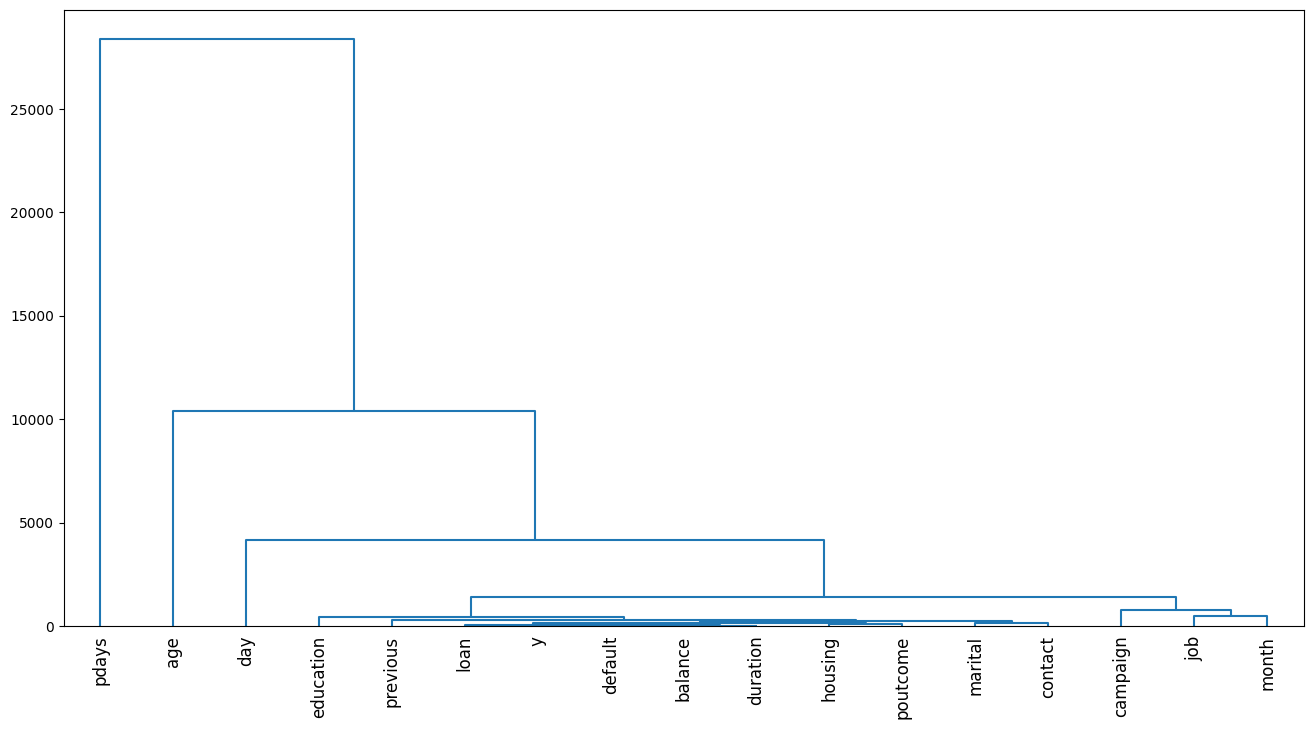

In [ ]:
import sklearn.neighbors
from scipy import cluster

dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
# Hacemos drop de los id de zona porque estos no van a tener relación con nada en principio
X_dist = df
D = dist.pairwise(X_dist.T)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

plt.figure(figsize=(16, 8))
threshold_2 = 0.7
clusters = cluster.hierarchy.linkage(D, method='complete')
cluster.hierarchy.dendrogram(clusters, color_threshold=threshold_2, labels=X_dist.columns.to_list(), leaf_rotation=90)
plt.show()

En este dendograma observo que las variables más útiles para clusterizar es pdays, age y day, por lo cual parecen indispensables para el clustering. En cuanto a las demás, las refinaré por criterio propio y para que sean útiles en la clusterización.

Selección de características:

In [ ]:
X = df.drop(["job", "default", "contact", "previous"], axis = 1)

Vamos a intentar determinar el número de clusters que nos sea eficiente.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Establemecemos un límite para realizar una prospección del coeficiente de Silueta (silhouette score)
limit = 10

for k in range(2, limit + 1):
    model = KMeans(n_clusters = k, n_init='auto', random_state=10)
    model.fit(X)
    pred = model.predict(X)
    score = silhouette_score(X, pred)

    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))


Silhouette Score for k = 2: 0.849
Silhouette Score for k = 3: 0.824
Silhouette Score for k = 4: 0.826
Silhouette Score for k = 5: 0.784
Silhouette Score for k = 6: 0.779
Silhouette Score for k = 7: 0.393
Silhouette Score for k = 8: 0.396
Silhouette Score for k = 9: 0.385
Silhouette Score for k = 10: 0.373


# Entrenamiento del modelo.

En cuanto al modelo, me decidí por el Kmeans porque es el que he acostumbrado a usar y es el que más me gusta, ya que puedo usar la puntuación de silueta para ver cuántos clusters hacer y ver si vale la pena, siento que es más manejable y personalizable que los demás, por eso la decisión.

In [ ]:
    model = KMeans(n_clusters = 6, n_init='auto', random_state=10)
    model.fit(X)
    pred = model.predict(X)
    score = silhouette_score(X, pred)

    print('Silhouette Score for k = {}: {:<.3f}'.format(6, score))

Silhouette Score for k = 6: 0.779


## Técnicas de reducción de la dimensionalidad:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Establemecemos un límite para realizar una prospección del coeficiente de Silueta (silhouette score)
limit = 10

for k in range(2, limit + 1):
    model = KMeans(n_clusters = k, n_init='auto', random_state=10)
    model.fit(X_PCA)
    pred = model.predict(X_PCA)
    score = silhouette_score(X_PCA, pred)

    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))


Silhouette Score for k = 2: 0.867
Silhouette Score for k = 3: 0.859
Silhouette Score for k = 4: 0.862
Silhouette Score for k = 5: 0.846
Silhouette Score for k = 6: 0.833
Silhouette Score for k = 7: 0.613
Silhouette Score for k = 8: 0.618
Silhouette Score for k = 9: 0.608
Silhouette Score for k = 10: 0.598


In [ ]:
model = KMeans(n_clusters = 7, n_init='auto', random_state=10)
model.fit(X_PCA)
pred_PCA = model.predict(X_PCA)

score = silhouette_score(X_PCA, pred)
print('Silhouette Score for k = {}: {:<.3f}'.format(7, score))

Silhouette Score for k = 7: 0.613


Parece que nos fue mejor con este clustering, así que vamos a utilizarlo para asignar las etiquetas a nuestro dataframe.

In [ ]:
df_results = X
df_results["Cluster"] = pred_PCA
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Cluster
0,30,10,1,1,0,0.068455,0,0,0,19,10,0.024826,1,-1,0,0,0,6
1,33,7,1,2,0,0.108750,1,1,0,11,5,0.071500,1,339,4,1,0,4
2,35,4,2,3,0,0.062590,1,0,0,16,4,0.059914,1,330,1,1,0,4


Graficamos para ver cómo ha quedado.

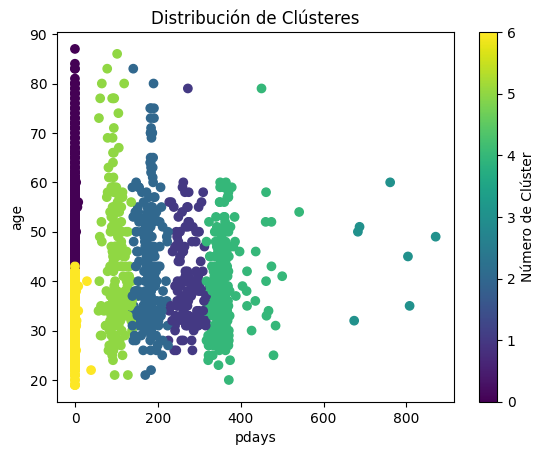

In [ ]:
plt.scatter(df_results["pdays"], df_results["age"], c=df_results["Cluster"], cmap='viridis')

# Agregar etiquetas y título
plt.xlabel('pdays')
plt.ylabel('age')
plt.title('Distribución de Clústeres')

# Mostrar la gráfica
plt.colorbar(label='Número de Clúster')
plt.show()

Graficamos en 3D para incluir otra variable más y ver todo más distinguido en otro plano. APORTE EXTRA.

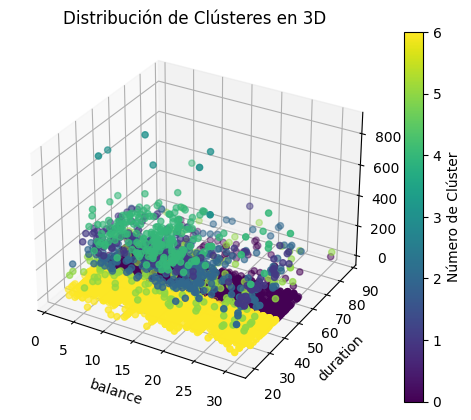

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot en 3D
scatter = ax.scatter(df['day'], df['age'], df['pdays'], c=df["Cluster"], cmap='viridis')

# Agregar etiquetas y título
ax.set_xlabel('balance')
ax.set_ylabel('duration')
ax.set_zlabel('y')
plt.title('Distribución de Clústeres en 3D')

# Agregar leyenda de colores
plt.colorbar(scatter, label='Número de Clúster')

# Mostrar la gráfica
plt.show()

## Para exportar el dataset obtenido ahora etiquetado con los clusters, solamente lo convierto en CSV.

In [ ]:
df_results.to_csv('clustering.csv', index=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Cluster
0,30,10,1,1,0,0.068455,0,0,0,19,10,0.024826,1,-1,0,0,0,6
1,33,7,1,2,0,0.108750,1,1,0,11,5,0.071500,1,339,4,1,0,4
2,35,4,2,3,0,0.062590,1,0,0,16,4,0.059914,1,330,1,1,0,4


Para interpretar los resultados, lo voy a hacer aquí:

In [ ]:
df_results["Cluster"].value_counts()

Cluster
6    2258
0    1463
2     250
4     221
5     191
1     131
3       7
Name: count, dtype: int64

Los clusters mayoritarios son el 6 y el 0, vamos a empezar por esos.

## Leyenda:

### Job:

Admin: 0,
Blue Collar: 1,
Entrepreneur: 2,
Housemaid: 3,
Management: 4,
Retired: 5,
Self-Employed: 6,
Services: 7,
Stuudent: 8,
Technician: 9,
Unemployed: 10,
Unknown: 11

### Marital

Divorced: 0,
Married: 1,
Single: 2

### Education

Unknown: 0,
Primary: 1,
Secondary: 2,
Tertiary: 3

### Default

No: 0,
Yes: 1

### Housing

No: 0,
Yes: 1

### Loan

No: 0,
Yes: 1

### Contact

Cellular: 0,
Telephone: 1,
Unknown: 2

### poutcome

unknown: 0,
failure: 1,
other: 2,
success: 3

### Target

No: 0,
Yes: 1

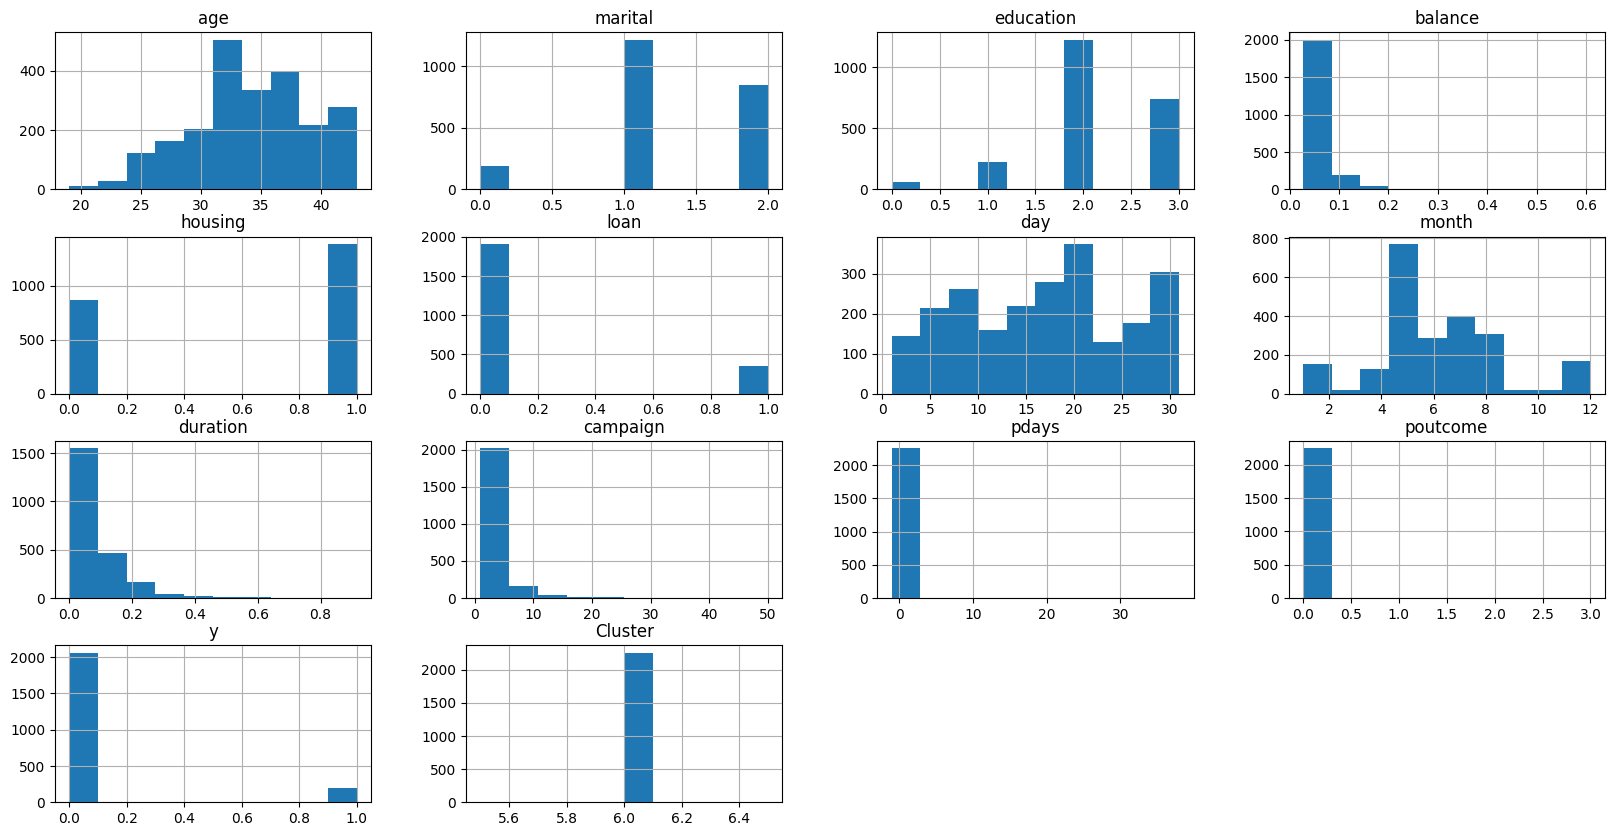

In [ ]:
cluster_6_data = df_results[df_results["Cluster"] == 6]

# Trazar el histograma de la columna "Cluster"
cluster_6_data.hist(figsize=(20, 10), bins=10)

# Mostrar el histograma
plt.title('Histograma de la columna "Cluster" cuando su valor es igual a 6')
plt.xlabel('Valor del clúster')
plt.ylabel('Frecuencia')
plt.show()

Este cluster, que es el mayoritario con 2258 entradas, es un grupo que no se está captando (esto lo digo en referencia a lo que representa el "target), y se trata de personas mayormente entre 30 y 40 años, que están casados o solteros (no divorciados), que tienen un nivel de educación secundario, tienen un balance bajo, tienen un préstamo para la casa mayormente, pero no tienen un préstamo personal. Han sido contactados a mitad de mes o a final de mes, durante los meses 4 y 6, que tienen una duración corta, y han estado en muy pocas campañas, y donde el último dia de contacto "pdays" es 0, donde no se sabe si aceptaron o no ("unknown").

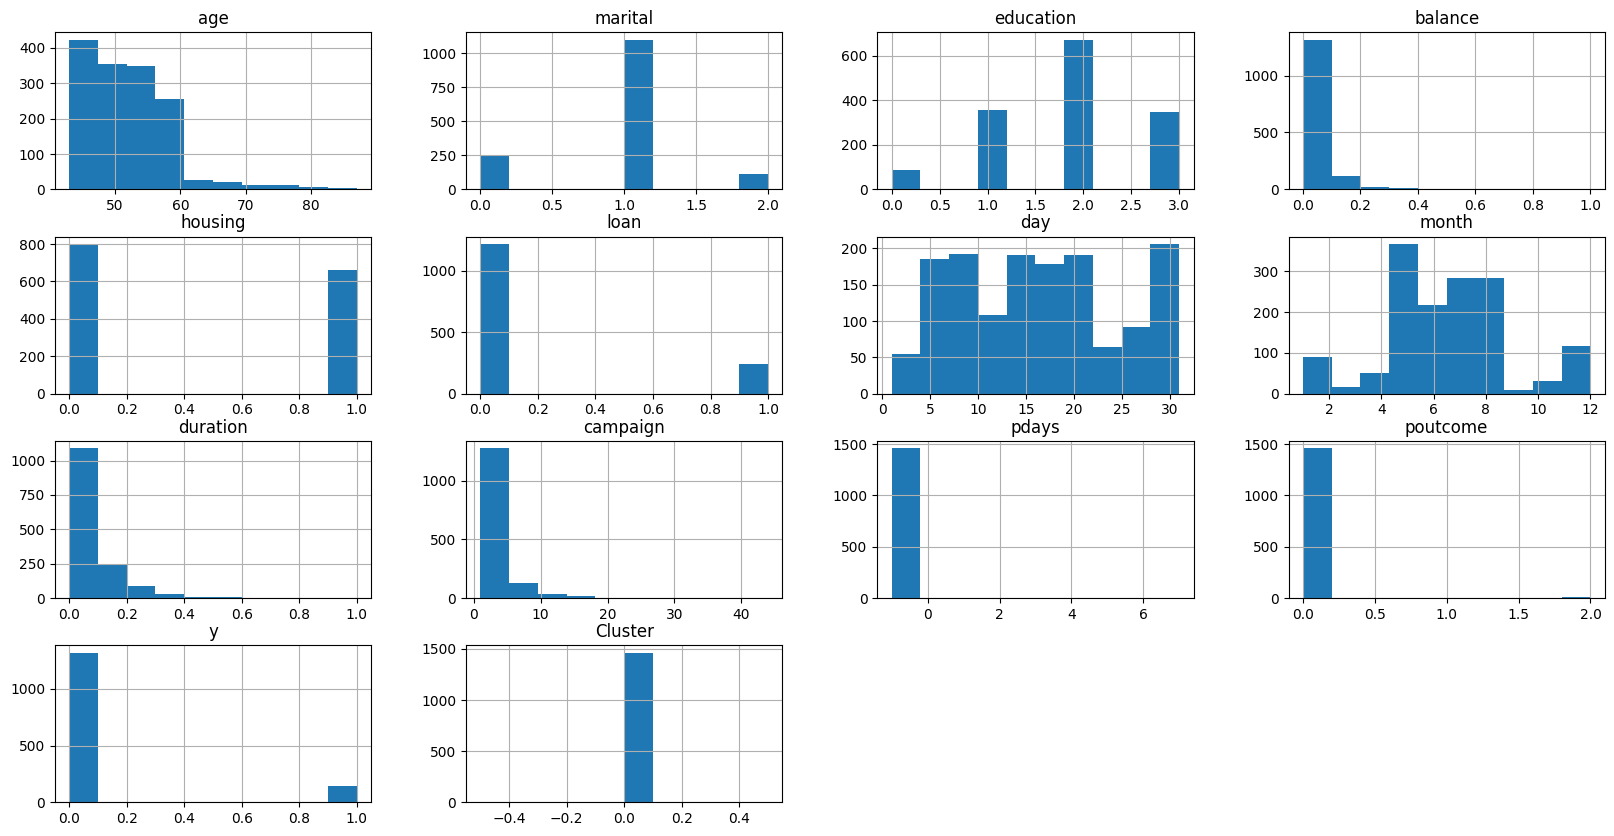

In [ ]:
cluster_0_data = df_results[df_results["Cluster"] == 0]

# Trazar el histograma de la columna "Cluster"
cluster_0_data.hist(figsize=(20, 10), bins=10)

# Mostrar el histograma
plt.title('Histograma de la columna "Cluster" cuando su valor es igual a 0')
plt.xlabel('Valor del clúster')
plt.ylabel('Frecuencia')
plt.show()

Este clúster, que nuevamente no se capta, sin embargo, contiene a personas de entre 40 y muchos para adelante, hasta los 60 mayormente. Son personas casadas, con educación mayormente secundaria, un balance bajo, que la mayoría no tiene un préstamo para la casa, ni uno personal, que han sido contactados de los días 5 a 10, 15 a 20, y los últimos días del mes, entre los meses 4-8, con una duración nuevamente corta, que han respondido a pocas campañas generalmente, y nunca han contactado (pdays -1), por tanto no se sabe el resultado de las campañas en ellos.

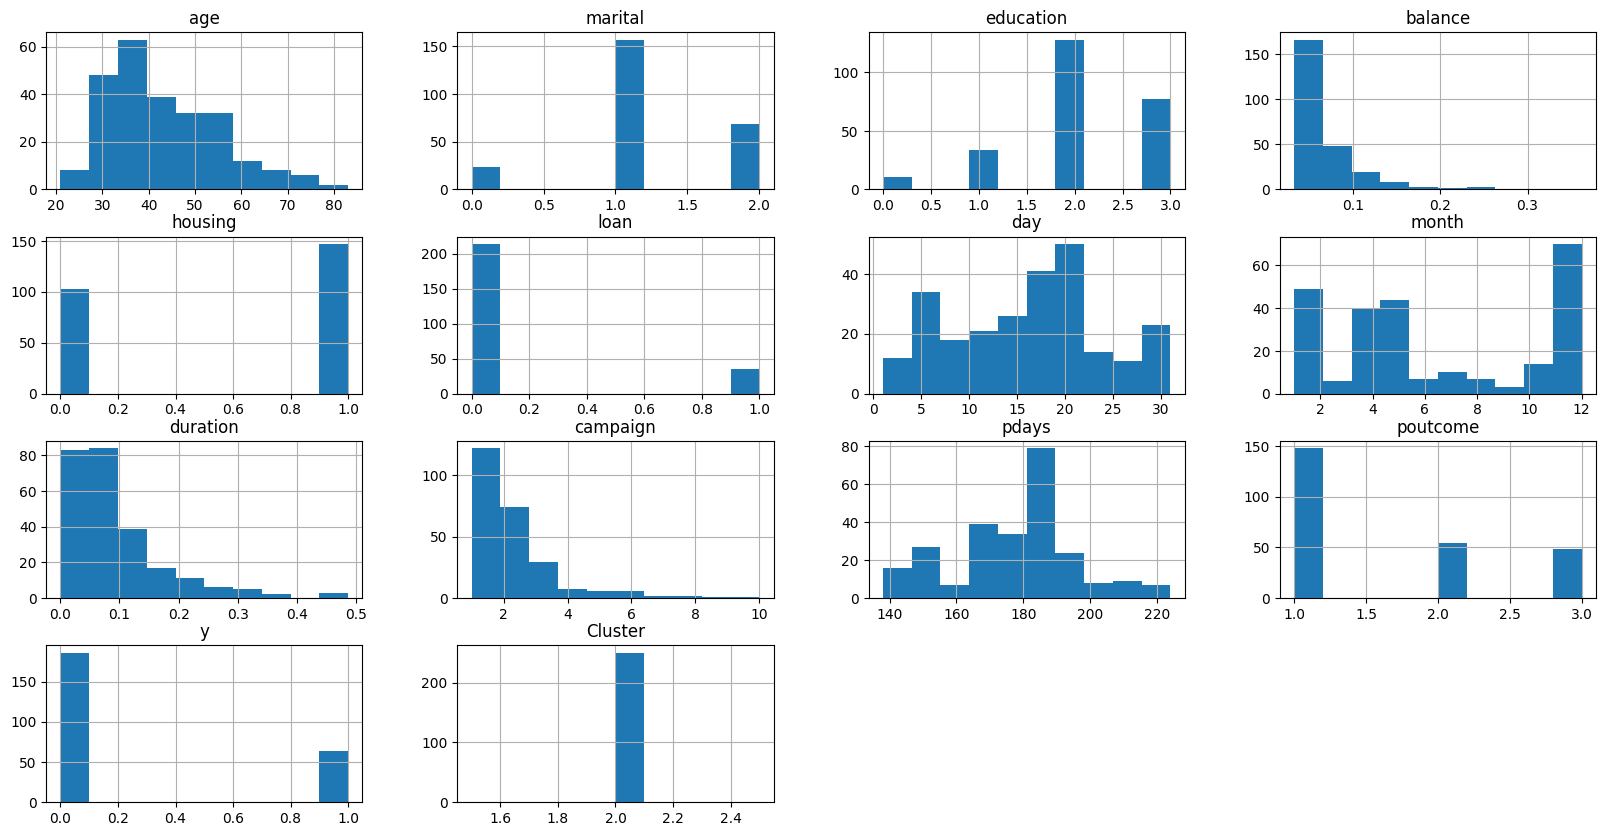

In [ ]:
cluster_2_data = df_results[df_results["Cluster"] == 2]

# Trazar el histograma de la columna "Cluster"
cluster_2_data.hist(figsize=(20, 10), bins=10)

# Mostrar el histograma
plt.title('Histograma de la columna "Cluster" cuando su valor es igual a 2')
plt.xlabel('Valor del clúster')
plt.ylabel('Frecuencia')
plt.show()